In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

# Contexto do trabalho

A doença de Alzheimer (DA) é uma doença neurodegenerativa e uma das principais causas de demência entre os idosos, atingindo milhões de pessoas ao redor do mundo. Atualmente, não existem tratamentos terapêuticos que impeçam a progressão da doença e apenas uma nova terapia foi aprovada nas últimas duas décadas. Devido ao fato de ser uma doença multifatorial e possuir inúmeros alvos terapêuticos, o estudo de fármacos que agem em apenas um alvo da
doença vem sendo rediscutido e tem dado lugar a busca por novas estratégias que possibilitem a descoberta de fármacos com atividade multialvo.

Nesse trabalho, utilizamos a base de dados química de moléculas bioativas ChEMBL para criar um perfil multialvo utilizando os dados de inibição de três alvos presentes na fisiopatologia da DA, sendo eles a acetilcolinesterase, a proteína tau e a BACE 1 e para predição de moléculas do banco de dados de fármacos aprovados DrugBank que se encaixem nesse perfil.

# Importando o conjunto de dado

Utilizamos o notebook `Descritores` para calcular as features do modelo. Neste notebook há uma descrição de como foi gerado os descritores. Ai podemos decidir se vale a pena explicar essa parte ou já apresentamos diretamente os dados

## ACHE

In [21]:
ACHE = pd.read_csv('Dp_ACHE.csv', sep=';')
ACHE

Unnamed: 0       QED    MolWt  NumRotatableBonds    TPSA  NumHAcceptors  \
0              0  0.488124  300.362                  5   88.72              5   
1              1  0.765195  312.482                  5    6.48              3   
2              2  0.392838  258.494                 11    0.00              0   
3              3  0.485768  275.352                  5   64.93              4   
4              4  0.234841  363.414                  8  100.46              7   
...          ...       ...      ...                ...     ...            ...   
5143        5143  0.630629  418.880                  3   66.48              3   
5144        5144  0.586390  439.298                  3   66.48              3   
5145        5145  0.669862  398.462                  3   66.48              3   
5146        5146  0.661014  404.853                  3   66.48              3   
5147        5147  0.620107  434.879                  4   75.71              4   

      NumHDonors  Activity  
0              2       0.0  
1              0       0.0  
2              0       0.0  
3              2       0.0  
4              2       0.0  
...          ...       ...  
5143           1       1.0  
5144           1       1.0  
5145           1       1.0  
5146           1       1.0  
5147           1       1.0  

[5148 rows x 8 columns]

## BACE

In [22]:
BACE = pd.read_csv('Dp_BACE.csv', sep=';')
BACE

Unnamed: 0       QED    MolWt  NumRotatableBonds    TPSA  NumHAcceptors  \
0              0  0.157234  591.750                 17  188.95              8   
1              1  0.082313  778.114                 24  174.96              9   
2              2  0.152968  636.900                 19  145.86              8   
3              3  0.144127  619.804                 18  188.95              8   
4              4  0.158828  654.871                 18  180.00              9   
...          ...       ...      ...                ...     ...            ...   
8035        8035  0.424239  487.441                  2   93.70              6   
8036        8036  0.606267  499.572                  5  135.16              8   
8037        8037  0.611343  482.585                  3  131.09              6   
8038        8038  0.706905  429.427                  5  111.72              7   
8039        8039  0.713123  468.558                  3  133.59              7   

      NumHDonors  Activity  
0              6       0.0  
1              6       0.0  
2              5       0.0  
3              6       0.0  
4              5       0.0  
...          ...       ...  
8035           1       1.0  
8036           2       1.0  
8037           3       1.0  
8038           2       1.0  
8039           2       1.0  

[8040 rows x 8 columns]

## TAU

In [23]:
TAU = pd.read_csv('Dp_TAU.csv', sep=';')
TAU

Unnamed: 0       QED    MolWt  NumRotatableBonds   TPSA  NumHAcceptors  \
0             0  0.387190  356.381                  4  63.45              3   
1             1  0.618155  376.197                  2  41.13              2   
2             2  0.387190  356.381                  4  63.45              3   
3             3  0.800202  336.391                  3  49.85              4   
4             4  0.657127  355.441                  4  36.44              3   
..          ...       ...      ...                ...    ...            ...   
165         165  0.554085  414.870                  4  73.06              7   
166         166  0.545623  419.289                  3  63.83              6   
167         167  0.496768  463.740                  3  63.83              6   
168         168  0.482342  375.580                  8   6.25              1   
169         169  0.554085  414.870                  4  73.06              7   

     NumHDonors  Activity  
0             0       0.0  
1             2       0.0  
2             0       0.0  
3             0       0.0  
4             0       0.0  
..          ...       ...  
165           1       1.0  
166           1       1.0  
167           1       1.0  
168           0       1.0  
169           1       1.0  

[170 rows x 8 columns]

# Eliminando as moléculas inativas

## ACHE

In [24]:
for i in range(len(ACHE)):
    if ACHE['Activity'][i] == 0:
        ACHE=ACHE.drop(i,axis=0)
        
ACHE

Unnamed: 0       QED    MolWt  NumRotatableBonds   TPSA  NumHAcceptors  \
436          436  0.683243  365.473                  7  38.77              4   
437          437  0.619042  329.352                  1  68.23              6   
438          438  0.760072  381.472                  6  48.00              5   
439          439  0.755578  381.472                  6  48.00              5   
440          440  0.330777  348.534                 11   7.76              0   
...          ...       ...      ...                ...    ...            ...   
5143        5143  0.630629  418.880                  3  66.48              3   
5144        5144  0.586390  439.298                  3  66.48              3   
5145        5145  0.669862  398.462                  3  66.48              3   
5146        5146  0.661014  404.853                  3  66.48              3   
5147        5147  0.620107  434.879                  4  75.71              4   

      NumHDonors  Activity  
436            0       NaN  
437            1       NaN  
438            0       NaN  
439            0       NaN  
440            0       NaN  
...          ...       ...  
5143           1       1.0  
5144           1       1.0  
5145           1       1.0  
5146           1       1.0  
5147           1       1.0  

[1666 rows x 8 columns]

In [25]:
ACHE = ACHE.dropna(axis=0)
ACHE

Unnamed: 0       QED    MolWt  NumRotatableBonds   TPSA  NumHAcceptors  \
563          563  0.196465  592.224                 11  83.48              5   
564          564  0.577970  463.714                  9  34.64              5   
565          565  0.803704  411.855                  5  35.58              3   
566          566  0.269223  417.529                 11  59.28              3   
567          567  0.683535  242.322                  0  58.88              2   
...          ...       ...      ...                ...    ...            ...   
5143        5143  0.630629  418.880                  3  66.48              3   
5144        5144  0.586390  439.298                  3  66.48              3   
5145        5145  0.669862  398.462                  3  66.48              3   
5146        5146  0.661014  404.853                  3  66.48              3   
5147        5147  0.620107  434.879                  4  75.71              4   

      NumHDonors  Activity  
563            3       1.0  
564            1       1.0  
565            1       1.0  
566            1       1.0  
567            2       1.0  
...          ...       ...  
5143           1       1.0  
5144           1       1.0  
5145           1       1.0  
5146           1       1.0  
5147           1       1.0  

[710 rows x 8 columns]

## BACE

In [26]:
for i in range(len(BACE)):
    if BACE['Activity'][i] == 0:
        BACE=BACE.drop(i,axis=0)
        
BACE

Unnamed: 0       QED    MolWt  NumRotatableBonds    TPSA  NumHAcceptors  \
367          367  0.358767  430.533                  5   89.60              4   
368          368  0.631234  462.532                  4  127.57              9   
369          369  0.417946  381.483                  3   58.01              4   
370          370  0.690483  390.572                  8   79.00              4   
371          371  0.680988  411.455                  3  117.58              6   
...          ...       ...      ...                ...     ...            ...   
8035        8035  0.424239  487.441                  2   93.70              6   
8036        8036  0.606267  499.572                  5  135.16              8   
8037        8037  0.611343  482.585                  3  131.09              6   
8038        8038  0.706905  429.427                  5  111.72              7   
8039        8039  0.713123  468.558                  3  133.59              7   

      NumHDonors  Activity  
367            2       NaN  
368            1       NaN  
369            2       NaN  
370            1       NaN  
371            3       NaN  
...          ...       ...  
8035           1       1.0  
8036           2       1.0  
8037           3       1.0  
8038           2       1.0  
8039           2       1.0  

[4502 rows x 8 columns]

In [27]:
BACE = BACE.dropna(axis=0)
BACE

Unnamed: 0       QED    MolWt  NumRotatableBonds    TPSA  NumHAcceptors  \
747          747  0.294756  533.416                  8  135.08              6   
748          748  0.283129  536.441                  8  131.84              6   
749          749  0.309941  516.385                  7  131.84              5   
750          750  0.308631  512.998                  8  135.08              6   
751          751  0.779174  429.481                  4  120.73              9   
...          ...       ...      ...                ...     ...            ...   
8035        8035  0.424239  487.441                  2   93.70              6   
8036        8036  0.606267  499.572                  5  135.16              8   
8037        8037  0.611343  482.585                  3  131.09              6   
8038        8038  0.706905  429.427                  5  111.72              7   
8039        8039  0.713123  468.558                  3  133.59              7   

      NumHDonors  Activity  
747            3       1.0  
748            3       1.0  
749            3       1.0  
750            3       1.0  
751            1       1.0  
...          ...       ...  
8035           1       1.0  
8036           2       1.0  
8037           3       1.0  
8038           2       1.0  
8039           2       1.0  

[2366 rows x 8 columns]

## TAU

In [28]:
for i in range(len(TAU)):
    if TAU['Activity'][i] == 0:
        TAU=TAU.drop(i,axis=0)
        
TAU

Unnamed: 0       QED    MolWt  NumRotatableBonds   TPSA  NumHAcceptors  \
16           16  0.567081  366.464                  4  23.55              2   
17           17  0.258055  444.462                  8  72.68              4   
18           18  0.589777  384.479                  5  32.78              3   
19           19  0.553711  380.491                  5  23.55              2   
20           20  0.663992  341.414                  3  36.44              3   
..          ...       ...      ...                ...    ...            ...   
165         165  0.554085  414.870                  4  73.06              7   
166         166  0.545623  419.289                  3  63.83              6   
167         167  0.496768  463.740                  3  63.83              6   
168         168  0.482342  375.580                  8   6.25              1   
169         169  0.554085  414.870                  4  73.06              7   

     NumHDonors  Activity  
16            0       NaN  
17            0       NaN  
18            0       NaN  
19            0       NaN  
20            0       NaN  
..          ...       ...  
165           1       1.0  
166           1       1.0  
167           1       1.0  
168           0       1.0  
169           1       1.0  

[77 rows x 8 columns]

In [29]:
TAU = TAU.dropna(axis=0)
TAU

Unnamed: 0       QED    MolWt  NumRotatableBonds   TPSA  NumHAcceptors  \
48           48  0.673796  306.365                  3  52.57              3   
49           49  0.728251  327.359                  6  67.27              5   
50           50  0.644053  262.312                  2  55.12              2   
51           51  0.709979  312.344                  5  68.37              4   
52           52  0.883316  291.354                  3  45.23              3   
53           53  0.637716  368.452                  8  45.59              4   
54           54  0.532970  292.294                  3  72.24              3   
55           55  0.746618  341.386                  6  58.48              5   
56           56  0.745969  390.224                  3  32.67              3   
57           57  0.292099  432.521                 12  68.54              8   
58           58  0.725838  326.371                  6  54.38              4   
59           59  0.681402  340.398                  7  54.38              4   
60           60  0.698639  369.368                  5  73.86              4   
61           61  0.431264  408.268                  3  40.85              5   
152         152  0.523281  480.660                  6  38.74              6   
153         153  0.413417  450.630                  6  32.26              4   
154         154  0.478138  452.385                  4  73.06              7   
155         155  0.642023  344.414                  6  44.24              4   
156         156  0.571106  395.440                  4  85.95              8   
157         157  0.547072  454.574                  6  50.72              6   
158         158  0.716920  331.483                  3   6.25              1   
159         159  0.516272  400.843                  3  84.06              7   
160         160  0.582595  381.413                  4  85.95              8   
161         161  0.614500  370.500                  6  32.26              4   
162         162  0.501529  452.841                  3  63.83              6   
163         163  0.413001  422.576                  8  32.26              4   
164         164  0.486320  422.576                  6  32.26              4   
165         165  0.554085  414.870                  4  73.06              7   
166         166  0.545623  419.289                  3  63.83              6   
167         167  0.496768  463.740                  3  63.83              6   
168         168  0.482342  375.580                  8   6.25              1   
169         169  0.554085  414.870                  4  73.06              7   

     NumHDonors  Activity  
48            2       1.0  
49            2       1.0  
50            2       1.0  
51            2       1.0  
52            1       1.0  
53            1       1.0  
54            1       1.0  
55            1       1.0  
56            0       1.0  
57            0       1.0  
58            2       1.0  
59            2       1.0  
60            1       1.0  
61            0       1.0  
152           0       1.0  
153           0       1.0  
154           1       1.0  
155           0       1.0  
156           1       1.0  
157           0       1.0  
158           0       1.0  
159           2       1.0  
160           1       1.0  
161           0       1.0  
162           1       1.0  
163           0       1.0  
164           0       1.0  
165           1       1.0  
166           1       1.0  
167           1       1.0  
168           0       1.0  
169           1       1.0

In [30]:
ACHE = ACHE.drop('Unnamed: 0', axis=1)

In [31]:
ACHE = ACHE.drop('Activity', axis=1)

In [32]:
BACE = BACE.drop('Unnamed: 0', axis=1)

In [33]:
BACE = BACE.drop('Activity', axis=1)

In [34]:
TAU = TAU.drop('Unnamed: 0', axis=1)

In [35]:
TAU = TAU.drop('Activity', axis=1)

In [36]:
ACHE

QED    MolWt  NumRotatableBonds   TPSA  NumHAcceptors  NumHDonors
563   0.196465  592.224                 11  83.48              5           3
564   0.577970  463.714                  9  34.64              5           1
565   0.803704  411.855                  5  35.58              3           1
566   0.269223  417.529                 11  59.28              3           1
567   0.683535  242.322                  0  58.88              2           2
...        ...      ...                ...    ...            ...         ...
5143  0.630629  418.880                  3  66.48              3           1
5144  0.586390  439.298                  3  66.48              3           1
5145  0.669862  398.462                  3  66.48              3           1
5146  0.661014  404.853                  3  66.48              3           1
5147  0.620107  434.879                  4  75.71              4           1

[710 rows x 6 columns]

In [37]:
BACE

QED    MolWt  NumRotatableBonds    TPSA  NumHAcceptors  NumHDonors
747   0.294756  533.416                  8  135.08              6           3
748   0.283129  536.441                  8  131.84              6           3
749   0.309941  516.385                  7  131.84              5           3
750   0.308631  512.998                  8  135.08              6           3
751   0.779174  429.481                  4  120.73              9           1
...        ...      ...                ...     ...            ...         ...
8035  0.424239  487.441                  2   93.70              6           1
8036  0.606267  499.572                  5  135.16              8           2
8037  0.611343  482.585                  3  131.09              6           3
8038  0.706905  429.427                  5  111.72              7           2
8039  0.713123  468.558                  3  133.59              7           2

[2366 rows x 6 columns]

In [38]:
TAU

QED    MolWt  NumRotatableBonds   TPSA  NumHAcceptors  NumHDonors
48   0.673796  306.365                  3  52.57              3           2
49   0.728251  327.359                  6  67.27              5           2
50   0.644053  262.312                  2  55.12              2           2
51   0.709979  312.344                  5  68.37              4           2
52   0.883316  291.354                  3  45.23              3           1
53   0.637716  368.452                  8  45.59              4           1
54   0.532970  292.294                  3  72.24              3           1
55   0.746618  341.386                  6  58.48              5           1
56   0.745969  390.224                  3  32.67              3           0
57   0.292099  432.521                 12  68.54              8           0
58   0.725838  326.371                  6  54.38              4           2
59   0.681402  340.398                  7  54.38              4           2
60   0.698639  369.368                  5  73.86              4           1
61   0.431264  408.268                  3  40.85              5           0
152  0.523281  480.660                  6  38.74              6           0
153  0.413417  450.630                  6  32.26              4           0
154  0.478138  452.385                  4  73.06              7           1
155  0.642023  344.414                  6  44.24              4           0
156  0.571106  395.440                  4  85.95              8           1
157  0.547072  454.574                  6  50.72              6           0
158  0.716920  331.483                  3   6.25              1           0
159  0.516272  400.843                  3  84.06              7           2
160  0.582595  381.413                  4  85.95              8           1
161  0.614500  370.500                  6  32.26              4           0
162  0.501529  452.841                  3  63.83              6           1
163  0.413001  422.576                  8  32.26              4           0
164  0.486320  422.576                  6  32.26              4           0
165  0.554085  414.870                  4  73.06              7           1
166  0.545623  419.289                  3  63.83              6           1
167  0.496768  463.740                  3  63.83              6           1
168  0.482342  375.580                  8   6.25              1           0
169  0.554085  414.870                  4  73.06              7           1

# Padronizando o banco de dados com MinMaxScaler

Primeiramente, eu fiz uma padronização com o `StandardScaler`, mas os resultados não foram satisfatórios, por isso alterei para esse método

## ACHE

In [39]:
scaler = MinMaxScaler()
scaler.fit(ACHE)
ACHE=scaler.transform(ACHE)

In [40]:
ACHE = pd.DataFrame(ACHE, columns = ['QED', 'MolWt', 'NumRotatableBonds', 'TPSA', 'NumHAcceptors', 'NumHDonors'])
ACHE

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0    0.157990  0.982866           0.578947  0.428999       0.416667   
1    0.607398  0.686354           0.473684  0.167879       0.416667   
2    0.873310  0.566700           0.263158  0.172904       0.250000   
3    0.243697  0.579791           0.578947  0.299615       0.250000   
4    0.731753  0.175535           0.000000  0.297476       0.166667   
..        ...       ...                ...       ...            ...   
705  0.669430  0.582908           0.157895  0.338109       0.250000   
706  0.617317  0.630019           0.157895  0.338109       0.250000   
707  0.715646  0.535798           0.157895  0.338109       0.250000   
708  0.705223  0.550544           0.157895  0.338109       0.250000   
709  0.657035  0.619823           0.210526  0.387457       0.333333   

     NumHDonors  
0      0.428571  
1      0.142857  
2      0.142857  
3      0.142857  
4      0.285714  
..          ...  
705    0.142857  
706    0.142857  
707    0.142857  
708    0.142857  
709    0.142857  

[710 rows x 6 columns]

In [77]:
ACHE['Color'] = '1' #Estou assinalando uma cor para cada proteína, pois será usado no gráfico em 3 dimensões
ACHE

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0    0.157990  0.982866           0.578947  0.428999       0.416667   
1    0.607398  0.686354           0.473684  0.167879       0.416667   
2    0.873310  0.566700           0.263158  0.172904       0.250000   
3    0.243697  0.579791           0.578947  0.299615       0.250000   
4    0.731753  0.175535           0.000000  0.297476       0.166667   
..        ...       ...                ...       ...            ...   
705  0.669430  0.582908           0.157895  0.338109       0.250000   
706  0.617317  0.630019           0.157895  0.338109       0.250000   
707  0.715646  0.535798           0.157895  0.338109       0.250000   
708  0.705223  0.550544           0.157895  0.338109       0.250000   
709  0.657035  0.619823           0.210526  0.387457       0.333333   

     NumHDonors Color  
0      0.428571     1  
1      0.142857     1  
2      0.142857     1  
3      0.142857     1  
4      0.285714     1  
..          ...   ...  
705    0.142857     1  
706    0.142857     1  
707    0.142857     1  
708    0.142857     1  
709    0.142857     1  

[710 rows x 7 columns]

# Visualização dos resultados

O objetivo de fazer o gráfico abaixo é ter insights sobre quais seriam as melhores features para passar para o K-means. A aluna precisava se formar, então o objetivo não foi gerar um modelo de k-means com várias features, mas escolher poucas features que pudessem trazer alguma discussão sobre as propriedades de possíveis inibidores multialvos. Por isso, escolher o MolWt e o QED para passar ao modelo

In [43]:
fig = px.scatter_matrix(ACHE.drop(ACHE.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

# Defining features to clustering

In [44]:
X = ACHE.iloc[:, [0, 1]].values
X

array([[0.15799037, 0.98286595],
       [0.60739842, 0.68635413],
       [0.87331021, 0.56669958],
       ...,
       [0.71564579, 0.53579784],
       [0.70522268, 0.55054383],
       [0.65703471, 0.61982298]])

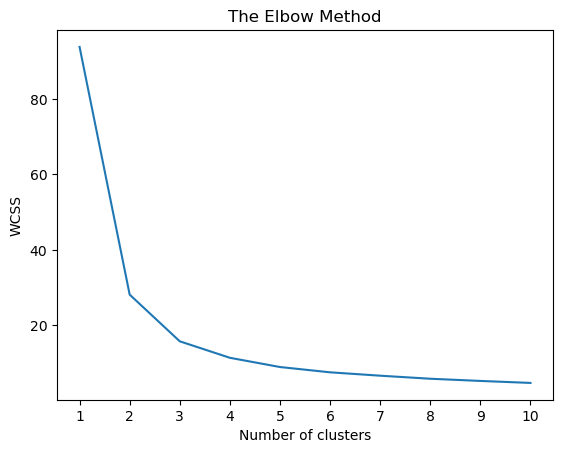

In [45]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [46]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

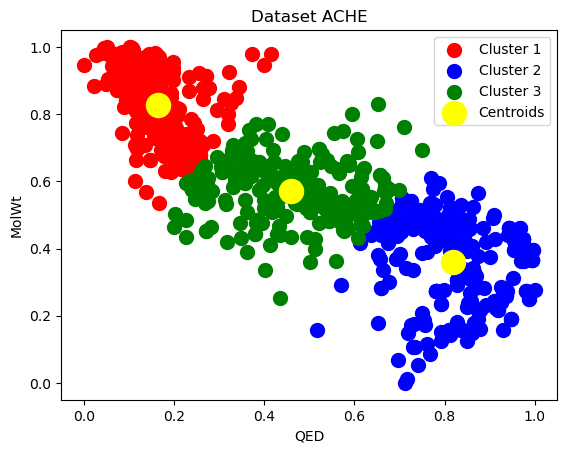

In [47]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset ACHE')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()

## BACE

In [48]:
scaler = MinMaxScaler()
scaler.fit(BACE)
BACE=scaler.transform(BACE)

In [49]:
BACE = pd.DataFrame(BACE, columns = ['QED', 'MolWt', 'NumRotatableBonds', 'TPSA', 'NumHAcceptors', 'NumHDonors'])
BACE

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0     0.293506  0.155467           0.137931  0.159240       0.181818   
1     0.280643  0.157717           0.137931  0.154218       0.181818   
2     0.310302  0.142800           0.120690  0.154218       0.136364   
3     0.308854  0.140281           0.137931  0.159240       0.181818   
4     0.829360  0.078166           0.068966  0.136998       0.318182   
...        ...       ...                ...       ...            ...   
2361  0.436737  0.121273           0.034483  0.095104       0.181818   
2362  0.638093  0.130295           0.086207  0.159364       0.272727   
2363  0.643708  0.117661           0.051724  0.153056       0.181818   
2364  0.749417  0.078125           0.086207  0.123034       0.227273   
2365  0.756296  0.107229           0.051724  0.156931       0.227273   

      NumHDonors  
0       0.130435  
1       0.130435  
2       0.130435  
3       0.130435  
4       0.043478  
...          ...  
2361    0.043478  
2362    0.086957  
2363    0.130435  
2364    0.086957  
2365    0.086957  

[2366 rows x 6 columns]

In [50]:
BACE['Color'] = '0'
BACE

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0     0.293506  0.155467           0.137931  0.159240       0.181818   
1     0.280643  0.157717           0.137931  0.154218       0.181818   
2     0.310302  0.142800           0.120690  0.154218       0.136364   
3     0.308854  0.140281           0.137931  0.159240       0.181818   
4     0.829360  0.078166           0.068966  0.136998       0.318182   
...        ...       ...                ...       ...            ...   
2361  0.436737  0.121273           0.034483  0.095104       0.181818   
2362  0.638093  0.130295           0.086207  0.159364       0.272727   
2363  0.643708  0.117661           0.051724  0.153056       0.181818   
2364  0.749417  0.078125           0.086207  0.123034       0.227273   
2365  0.756296  0.107229           0.051724  0.156931       0.227273   

      NumHDonors Color  
0       0.130435     0  
1       0.130435     0  
2       0.130435     0  
3       0.130435     0  
4       0.043478     0  
...          ...   ...  
2361    0.043478     0  
2362    0.086957     0  
2363    0.130435     0  
2364    0.086957     0  
2365    0.086957     0  

[2366 rows x 7 columns]

In [51]:
fig = px.scatter_matrix(BACE.drop(BACE.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

# Defining features to clustering

In [52]:
X = BACE.iloc[:, [0, 1]].values
X

array([[0.29350555, 0.15546683],
       [0.2806432 , 0.15771667],
       [0.31030245, 0.14280009],
       ...,
       [0.64370808, 0.11766145],
       [0.74941725, 0.07812537],
       [0.75629552, 0.10722892]])

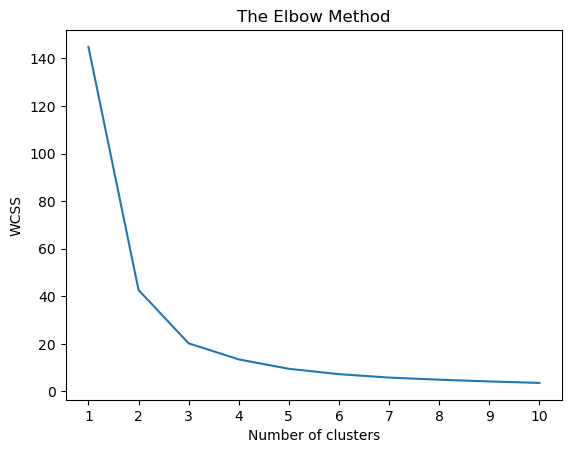

In [53]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

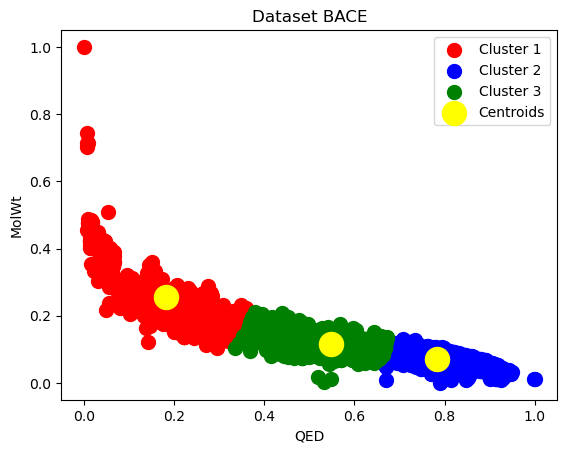

In [55]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset BACE')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()

## TAU

In [56]:
scaler = MinMaxScaler()
scaler.fit(TAU)
TAU=scaler.transform(TAU)

In [57]:
TAU = pd.DataFrame(TAU, columns = ['QED', 'MolWt', 'NumRotatableBonds', 'TPSA', 'NumHAcceptors', 'NumHDonors'])
TAU

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  NumHDonors
0   0.645612  0.201756                0.1  0.581179       0.285714         1.0
1   0.737719  0.297905                0.4  0.765621       0.571429         1.0
2   0.595304  0.000000                0.0  0.613174       0.142857         1.0
3   0.706814  0.229139                0.3  0.779423       0.428571         1.0
4   1.000000  0.133008                0.1  0.489084       0.285714         0.5
5   0.584586  0.486105                0.6  0.493601       0.428571         0.5
6   0.407416  0.137313                0.1  0.827980       0.285714         0.5
7   0.768786  0.362147                0.4  0.655332       0.571429         0.5
8   0.767688  0.585817                0.1  0.331493       0.285714         0.0
9   0.000000  0.779531                1.0  0.781556       1.000000         0.0
10  0.733639  0.293380                0.4  0.603890       0.428571         1.0
11  0.658477  0.357622                0.5  0.603890       0.428571         1.0
12  0.687633  0.490300                0.3  0.848306       0.428571         0.5
13  0.235388  0.668456                0.1  0.434128       0.571429         0.0
14  0.391028  1.000000                0.4  0.407654       0.714286         0.0
15  0.205200  0.862467                0.4  0.326349       0.428571         0.0
16  0.314671  0.870505                0.2  0.838269       0.857143         0.5
17  0.591870  0.376014                0.4  0.476662       0.428571         0.0
18  0.471920  0.609706                0.2  1.000000       1.000000         0.5
19  0.431269  0.880530                0.4  0.557967       0.714286         0.0
20  0.718554  0.316792                0.1  0.000000       0.000000         0.0
21  0.379172  0.634451                0.1  0.976286       0.857143         1.0
22  0.491353  0.545464                0.2  1.000000       1.000000         0.5
23  0.545318  0.495484                0.4  0.326349       0.428571         0.0
24  0.354236  0.872593                0.1  0.722459       0.714286         0.5
25  0.204498  0.733984                0.6  0.326349       0.428571         0.0
26  0.328511  0.733984                0.4  0.326349       0.428571         0.0
27  0.443130  0.698692                0.2  0.838269       0.857143         0.5
28  0.428817  0.718930                0.1  0.722459       0.714286         0.5
29  0.346183  0.922509                0.1  0.722459       0.714286         0.5
30  0.321782  0.518750                0.6  0.000000       0.000000         0.0
31  0.443130  0.698692                0.2  0.838269       0.857143         0.5

In [58]:
TAU['Color'] = '2'
TAU

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0   0.645612  0.201756                0.1  0.581179       0.285714   
1   0.737719  0.297905                0.4  0.765621       0.571429   
2   0.595304  0.000000                0.0  0.613174       0.142857   
3   0.706814  0.229139                0.3  0.779423       0.428571   
4   1.000000  0.133008                0.1  0.489084       0.285714   
5   0.584586  0.486105                0.6  0.493601       0.428571   
6   0.407416  0.137313                0.1  0.827980       0.285714   
7   0.768786  0.362147                0.4  0.655332       0.571429   
8   0.767688  0.585817                0.1  0.331493       0.285714   
9   0.000000  0.779531                1.0  0.781556       1.000000   
10  0.733639  0.293380                0.4  0.603890       0.428571   
11  0.658477  0.357622                0.5  0.603890       0.428571   
12  0.687633  0.490300                0.3  0.848306       0.428571   
13  0.235388  0.668456                0.1  0.434128       0.571429   
14  0.391028  1.000000                0.4  0.407654       0.714286   
15  0.205200  0.862467                0.4  0.326349       0.428571   
16  0.314671  0.870505                0.2  0.838269       0.857143   
17  0.591870  0.376014                0.4  0.476662       0.428571   
18  0.471920  0.609706                0.2  1.000000       1.000000   
19  0.431269  0.880530                0.4  0.557967       0.714286   
20  0.718554  0.316792                0.1  0.000000       0.000000   
21  0.379172  0.634451                0.1  0.976286       0.857143   
22  0.491353  0.545464                0.2  1.000000       1.000000   
23  0.545318  0.495484                0.4  0.326349       0.428571   
24  0.354236  0.872593                0.1  0.722459       0.714286   
25  0.204498  0.733984                0.6  0.326349       0.428571   
26  0.328511  0.733984                0.4  0.326349       0.428571   
27  0.443130  0.698692                0.2  0.838269       0.857143   
28  0.428817  0.718930                0.1  0.722459       0.714286   
29  0.346183  0.922509                0.1  0.722459       0.714286   
30  0.321782  0.518750                0.6  0.000000       0.000000   
31  0.443130  0.698692                0.2  0.838269       0.857143   

    NumHDonors Color  
0          1.0     2  
1          1.0     2  
2          1.0     2  
3          1.0     2  
4          0.5     2  
5          0.5     2  
6          0.5     2  
7          0.5     2  
8          0.0     2  
9          0.0     2  
10         1.0     2  
11         1.0     2  
12         0.5     2  
13         0.0     2  
14         0.0     2  
15         0.0     2  
16         0.5     2  
17         0.0     2  
18         0.5     2  
19         0.0     2  
20         0.0     2  
21         1.0     2  
22         0.5     2  
23         0.0     2  
24         0.5     2  
25         0.0     2  
26         0.0     2  
27         0.5     2  
28         0.5     2  
29         0.5     2  
30         0.0     2  
31         0.5     2

In [59]:
fig = px.scatter_matrix(TAU.drop(TAU.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

# Defining features to clustering

In [60]:
X = TAU.iloc[:, [0, 1]].values
X

array([[0.64561205, 0.20175591],
       [0.7377192 , 0.29790518],
       [0.59530406, 0.        ],
       [0.70681408, 0.22913881],
       [1.        , 0.13300786],
       [0.58458585, 0.48610475],
       [0.40741579, 0.13731291],
       [0.76878632, 0.36214666],
       [0.76768839, 0.58581714],
       [0.        , 0.77953084],
       [0.73363866, 0.29338029],
       [0.65847698, 0.35762178],
       [0.68763272, 0.49029989],
       [0.23538785, 0.66845586],
       [0.3910276 , 1.        ],
       [0.20519968, 0.86246725],
       [0.31467108, 0.87050488],
       [0.59187038, 0.37601444],
       [0.47191956, 0.60970561],
       [0.43126867, 0.88053016],
       [0.71855396, 0.31679246],
       [0.37917211, 0.63445051],
       [0.49135325, 0.54546412],
       [0.54531828, 0.49548427],
       [0.35423611, 0.87259329],
       [0.20449763, 0.73398428],
       [0.32851054, 0.73398428],
       [0.44312998, 0.698692  ],
       [0.42881734, 0.71893033],
       [0.34618316, 0.92250902],
       [0.

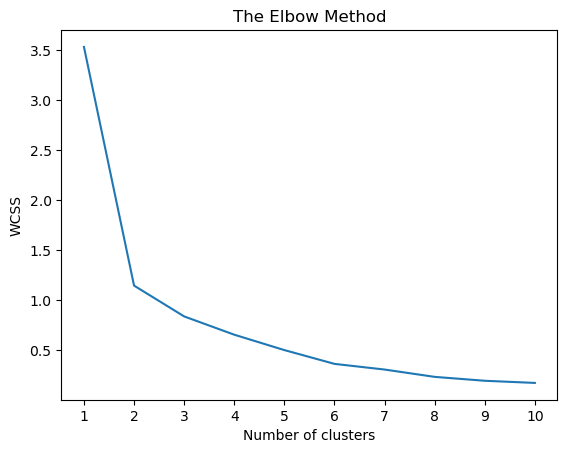

In [61]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [62]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

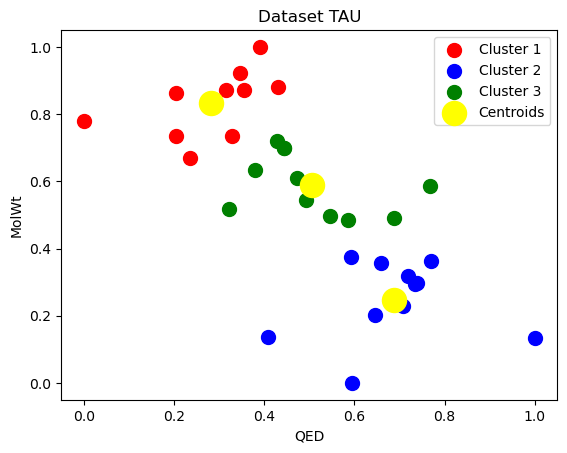

In [63]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset TAU')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()

# K-means com todas as variáveis

Não utilizamos esse modelo para previsão de novas moléculas. O objetivo era ver como seria um modelo com todas as features

## ACHE

In [64]:
X = ACHE.iloc[:,:-1].values
X

array([[0.15799037, 0.98286595, 0.57894737, 0.42899914, 0.41666667,
        0.42857143],
       [0.60739842, 0.68635413, 0.47368421, 0.16787853, 0.41666667,
        0.14285714],
       [0.87331021, 0.56669958, 0.26315789, 0.17290419, 0.25      ,
        0.14285714],
       ...,
       [0.71564579, 0.53579784, 0.15789474, 0.3381095 , 0.25      ,
        0.14285714],
       [0.70522268, 0.55054383, 0.15789474, 0.3381095 , 0.25      ,
        0.14285714],
       [0.65703471, 0.61982298, 0.21052632, 0.38745723, 0.33333333,
        0.14285714]])

In [66]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=BACE.drop("Color",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

## BACE

In [67]:
X = BACE.iloc[:,:-1].values
X

array([[0.29350555, 0.15546683, 0.13793103, 0.15923991, 0.18181818,
        0.13043478],
       [0.2806432 , 0.15771667, 0.13793103, 0.15421814, 0.18181818,
        0.13043478],
       [0.31030245, 0.14280009, 0.12068966, 0.15421814, 0.13636364,
        0.13043478],
       ...,
       [0.64370808, 0.11766145, 0.05172414, 0.15305569, 0.18181818,
        0.13043478],
       [0.74941725, 0.07812537, 0.0862069 , 0.12303353, 0.22727273,
        0.08695652],
       [0.75629552, 0.10722892, 0.05172414, 0.15693052, 0.22727273,
        0.08695652]])

In [68]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=BACE.drop("Color",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

## TAU

In [69]:
X = TAU.iloc[:,:-1].values
X

array([[0.64561205, 0.20175591, 0.1       , 0.58117942, 0.28571429,
        1.        ],
       [0.7377192 , 0.29790518, 0.4       , 0.76562108, 0.57142857,
        1.        ],
       [0.59530406, 0.        , 0.        , 0.6131744 , 0.14285714,
        1.        ],
       [0.70681408, 0.22913881, 0.3       , 0.77942284, 0.42857143,
        1.        ],
       [1.        , 0.13300786, 0.1       , 0.48908407, 0.28571429,
        0.5       ],
       [0.58458585, 0.48610475, 0.6       , 0.493601  , 0.42857143,
        0.5       ],
       [0.40741579, 0.13731291, 0.1       , 0.82797992, 0.28571429,
        0.5       ],
       [0.76878632, 0.36214666, 0.4       , 0.6553325 , 0.57142857,
        0.5       ],
       [0.76768839, 0.58581714, 0.1       , 0.3314931 , 0.28571429,
        0.        ],
       [0.        , 0.77953084, 1.        , 0.78155583, 1.        ,
        0.        ],
       [0.73363866, 0.29338029, 0.4       , 0.60388959, 0.42857143,
        1.        ],
       [0.65847698, 0

In [70]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=TAU.drop("Color",axis=1).columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()

# Juntando os datasets

In [73]:
ALL = pd.concat([ACHE, BACE, TAU])
ALL

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0   0.157990  0.982866           0.578947  0.428999       0.416667   
1   0.607398  0.686354           0.473684  0.167879       0.416667   
2   0.873310  0.566700           0.263158  0.172904       0.250000   
3   0.243697  0.579791           0.578947  0.299615       0.250000   
4   0.731753  0.175535           0.000000  0.297476       0.166667   
..       ...       ...                ...       ...            ...   
27  0.443130  0.698692           0.200000  0.838269       0.857143   
28  0.428817  0.718930           0.100000  0.722459       0.714286   
29  0.346183  0.922509           0.100000  0.722459       0.714286   
30  0.321782  0.518750           0.600000  0.000000       0.000000   
31  0.443130  0.698692           0.200000  0.838269       0.857143   

    NumHDonors Color  
0     0.428571     1  
1     0.142857     1  
2     0.142857     1  
3     0.142857     1  
4     0.285714     1  
..         ...   ...  
27    0.500000     2  
28    0.500000     2  
29    0.500000     2  
30    0.000000     2  
31    0.500000     2  

[3108 rows x 7 columns]

# Fazendo alguns gráficos com os dados das três proteínas

Os gráficos abaixo são exemplos para gente avaliar quais features são capazes de separar o conjunto de dados

In [74]:
fig = px.scatter_matrix(ALL.drop(ALL.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

In [75]:
fig1 = px.scatter(ALL, x="MolWt", y="QED", color="Color")
fig1.update_layout(title="3 Features Representation")
fig1.show()

In [76]:
fig2 = px.scatter_3d(ALL, x="MolWt", y="QED",z="TPSA",
                     color="Color",size="NumRotatableBonds")
fig2.update_layout(title="5 Features Representation")
fig2.show()

# Working with three dataset

# Defining features to clustering

In [98]:
X = ALL.iloc[:, [0, 1]].values
X

array([[0.15799037, 0.98286595],
       [0.60739842, 0.68635413],
       [0.87331021, 0.56669958],
       ...,
       [0.34618316, 0.92250902],
       [0.3217817 , 0.51874989],
       [0.44312998, 0.698692  ]])

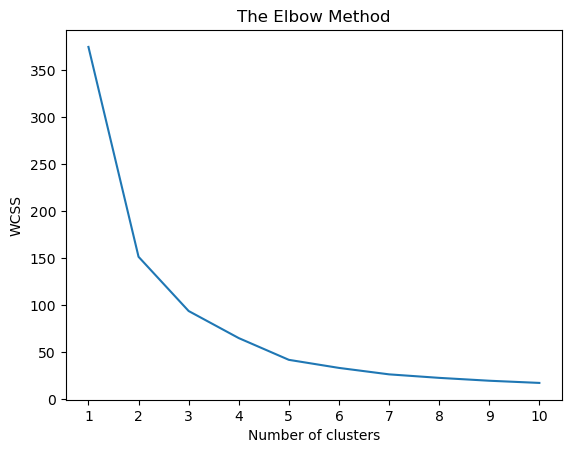

In [99]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([1,2,3,4,5,6,7,8,9,10]) 
plt.ylabel('WCSS')
plt.show()

# Training the K-Means model on the dataset

In [100]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters

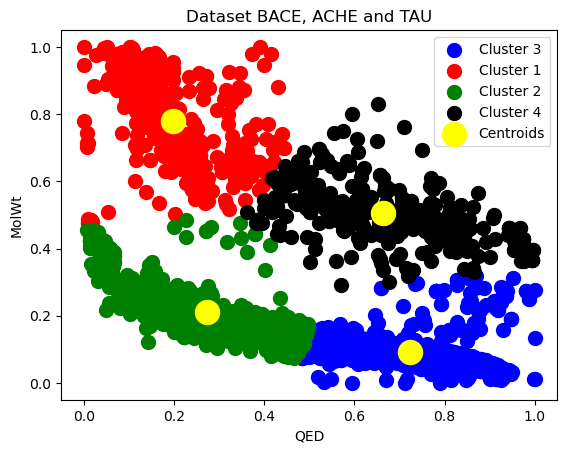

In [102]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Dataset BACE, ACHE and TAU')
plt.xlabel('QED')
plt.ylabel('MolWt')
plt.legend()
plt.show()

# Predição de inibidores multi-alvos a partir do banco de dados do Drugbank

Os descritores foram calculados de forma semelhante a que foi descrita no notebook `Descritores`. Os smiles dos inibidores foram obtidos no banco de dados DrugBank (https://go.drugbank.com/).

In [103]:
DRUGBANK = pd.read_csv('Dp_DRUGBANK.csv', sep=';')
DRUGBANK = DRUGBANK.drop('Unnamed: 0', axis=1)
DRUGBANK

QED     MolWt  NumRotatableBonds    TPSA  NumHAcceptors  NumHDonors
0     0.014175  2180.317                 66  904.07             29          27
1     0.008952  1209.421                 33  442.28             16          19
2     0.007151  1269.433                 32  505.97             17          19
3     0.022619  1811.253                 51  519.89             16          20
4     0.027501  1069.238                 19  435.41             15          14
...        ...       ...                ...     ...            ...         ...
1837  0.308506    63.012                  0   63.37              2           1
1838  0.365164    36.461                  0    0.00              0           0
1839  0.524584   110.112                  0   40.46              2           2
1840  0.293939   422.584                 16  106.97              6           1
1841  0.308506    63.012                  0   63.37              2           1

[1842 rows x 6 columns]

In [104]:
scaler = MinMaxScaler()
scaler.fit(DRUGBANK)
DRUGBANK=scaler.transform(DRUGBANK)

In [105]:
DRUGBANK = pd.DataFrame(DRUGBANK, columns = ['QED', 'MolWt', 'NumRotatableBonds', 'TPSA', 'NumHAcceptors', 'NumHDonors'])
DRUGBANK

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0     0.007579  0.435110           0.375000  0.396303       0.408451   
1     0.001943  0.240999           0.187500  0.193875       0.225352   
2     0.000000  0.252997           0.181818  0.221794       0.239437   
3     0.016689  0.361323           0.289773  0.227896       0.225352   
4     0.021957  0.212972           0.107955  0.190864       0.211268   
...        ...       ...                ...       ...            ...   
1837  0.325160  0.011798           0.000000  0.027779       0.028169   
1838  0.386294  0.006489           0.000000  0.000000       0.000000   
1839  0.558306  0.021214           0.000000  0.017736       0.028169   
1840  0.309442  0.083687           0.090909  0.046891       0.084507   
1841  0.325160  0.011798           0.000000  0.027779       0.028169   

      NumHDonors  
0         0.3375  
1         0.2375  
2         0.2375  
3         0.2500  
4         0.1750  
...          ...  
1837      0.0125  
1838      0.0000  
1839      0.0250  
1840      0.0125  
1841      0.0125  

[1842 rows x 6 columns]

In [106]:
DRUGBANK['Color'] = '3'
DRUGBANK

QED     MolWt  NumRotatableBonds      TPSA  NumHAcceptors  \
0     0.007579  0.435110           0.375000  0.396303       0.408451   
1     0.001943  0.240999           0.187500  0.193875       0.225352   
2     0.000000  0.252997           0.181818  0.221794       0.239437   
3     0.016689  0.361323           0.289773  0.227896       0.225352   
4     0.021957  0.212972           0.107955  0.190864       0.211268   
...        ...       ...                ...       ...            ...   
1837  0.325160  0.011798           0.000000  0.027779       0.028169   
1838  0.386294  0.006489           0.000000  0.000000       0.000000   
1839  0.558306  0.021214           0.000000  0.017736       0.028169   
1840  0.309442  0.083687           0.090909  0.046891       0.084507   
1841  0.325160  0.011798           0.000000  0.027779       0.028169   

      NumHDonors Color  
0         0.3375     3  
1         0.2375     3  
2         0.2375     3  
3         0.2500     3  
4         0.1750     3  
...          ...   ...  
1837      0.0125     3  
1838      0.0000     3  
1839      0.0250     3  
1840      0.0125     3  
1841      0.0125     3  

[1842 rows x 7 columns]

In [107]:
DRUGBANK.to_csv('Teste-cluster_drugbank.csv', sep=';')

In [108]:
fig = px.scatter_matrix(DRUGBANK.drop(DRUGBANK.columns[[6]], axis=1),
width=1200, height=1600)
fig.show()

In [109]:
DRUG = DRUGBANK.iloc[:, [0, 1]].values
DRUG

array([[0.00757899, 0.43510955],
       [0.00194251, 0.24099872],
       [0.        , 0.25299689],
       ...,
       [0.55830642, 0.02121433],
       [0.30944224, 0.08368673],
       [0.32515982, 0.01179764]])

In [110]:
drugbank_kmeans = kmeans.fit_predict(DRUG)

In [111]:
drugbank_kmeans = pd.DataFrame(drugbank_kmeans)
drugbank_kmeans

0
0     3
1     3
2     3
3     3
4     3
...  ..
1837  0
1838  0
1839  2
1840  0
1841  0

[1842 rows x 1 columns]

In [112]:
drugbank_kmeans.to_csv('Teste-cluster_drugbank-kmeans.csv', sep=';')

In [118]:
drugbank_kmeans.value_counts()

1    575
2    574
0    486
3    207
dtype: int64

In [119]:
DRUGBANK.iloc[:,0] ==1

0       False
1       False
2       False
3       False
4       False
        ...  
1837    False
1838    False
1839    False
1840    False
1841    False
Name: QED, Length: 1842, dtype: bool

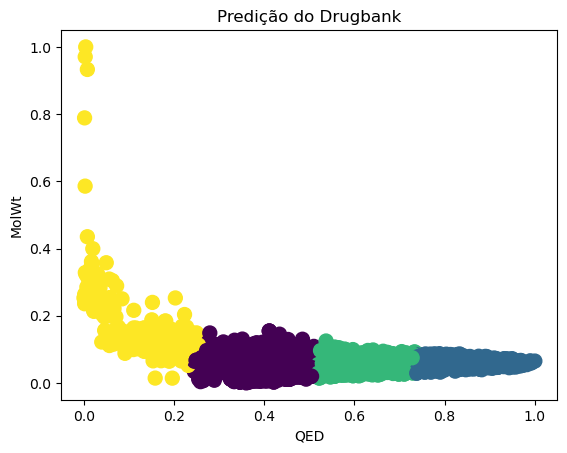

In [120]:
color = drugbank_kmeans.iloc[:,0]
plt.scatter(DRUGBANK.iloc[:,0], DRUGBANK.iloc[:,1], s = 100, c = color)
#plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Predição do Drugbank')
plt.xlabel('QED')
plt.ylabel('MolWt')
#plt.legend()
plt.show()

Ao todo foram preditas 207 moléculas com perfil multialvo (cluster 3, cor azul), e dentre elas 33 apresentaram estudos mostrando um possível potencial terapêutico na doença de Alzheimer.

Entre os alvos preditos, temos a `Leuprolida`, que é um agonista do receptor do hormônio liberador de gonadotrofina (GnRH), usada no tratamento paliativo do câncer de próstata, endometriose e puberdade precoce (WISHART, 2006), envolvida em estudos que mostram como alterações hormonais durante a menopausa e andropausa podem estar relacionados a patologias envolvidas na DA e como os agonistas de GnRH podem ser um potencial agente terapêutico para a DA (MEETHAL et al., 2005); antibióticos como a `Eritromicina`, que possui estudos mostrando uma possível atividade neuroprotetora em camundongos, com a diminuição na agregação de placas amilóides (TUCKER et al., 2005); anti-inflamatórios como o `Montelucaste` que possui estudos mostrando sua ação na neuroinflamação presente na DA (LAI et al., 2014), além de muitas vitaminas, tal como a `vitamina B12`, que possui diversos estudos relacionando sua deficiência com alterações hematológicas e efeitos neurológicos (SHIPTON; THACHIL, 2015), e seus efeitos em pacientes com DA (PRODAN et al., 2009).